### 과제 - pima indians 당뇨병 데이터
#### 1. 결정 트리와 SVM으로 학습하고 예측 수행 후 각각의 혼돈행렬, 정확도, 정밀도, 재현율, F1 스코어 계산

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/ka556/OneDrive/바탕 화면/멀티캠퍼스/MachineLearning/01.MachinLearning/01.Intro/pima-indians-diabetes.csv", skiprows=9, header=None)
df.columns = ['P','G','BP','S','I','BMI','D','Age','Class']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2022
)

- dtc

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2022)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.6948051948051948

In [5]:
from sklearn.metrics import confusion_matrix
# 혼돈행렬
pred_dtc = dtc.predict(X_test)
confusion_matrix(y_test, pred_dtc)

array([[74, 26],
       [21, 33]], dtype=int64)

In [6]:
from sklearn.metrics import accuracy_score
# 정확도
accuracy_score(y_test, pred_dtc)

0.6948051948051948

In [7]:
from sklearn.metrics import precision_score
# 정밀도
precision_score(y_test, pred_dtc)

0.559322033898305

In [8]:
from sklearn.metrics import recall_score
# 재현율
recall_score(y_test, pred_dtc)

0.6111111111111112

In [9]:
from sklearn.metrics import f1_score
# F1 score
f1_score(y_test, pred_dtc)

0.5840707964601771

- SVM

In [10]:
from sklearn.svm import SVC
svc= SVC(random_state=2022)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
pred_sv = svc.predict(X_test)


In [11]:
from sklearn.metrics import confusion_matrix
# 혼돈행렬
confusion_matrix(y_test, pred_sv)

array([[85, 15],
       [25, 29]], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
# 정확도
accuracy_score(y_test, pred_sv)

0.7402597402597403

In [13]:
from sklearn.metrics import precision_score
# 정밀도
precision_score(y_test, pred_sv)

0.6590909090909091

In [14]:
from sklearn.metrics import recall_score
# 재현율
recall_score(y_test, pred_sv)

0.5370370370370371

In [15]:
from sklearn.metrics import f1_score
# F1 score
f1_score(y_test, pred_sv)

0.5918367346938775

#### 2. 결정 트리에서 max_depth, min_samples_split, min_samples_leaf 값을 하나씩 선택해서 tree 그림 그리기

In [18]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

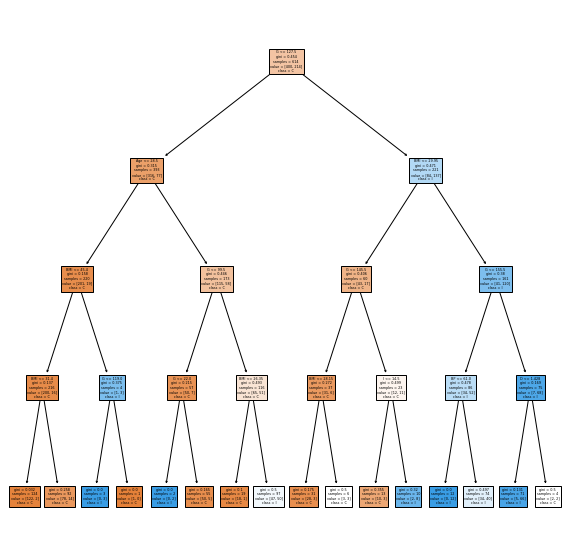

In [22]:
dtc_depth = DecisionTreeClassifier(max_depth=4, random_state=156)
dtc_depth.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc_depth, feature_names=df.columns, class_names='Class', filled=True)
plt.show()

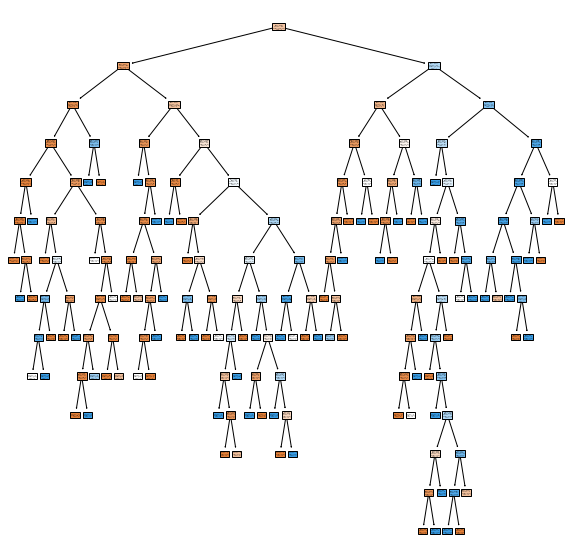

In [23]:
dtc_split = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc_split.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc_split, feature_names=df.columns, class_names='Class', filled=True)
plt.show()

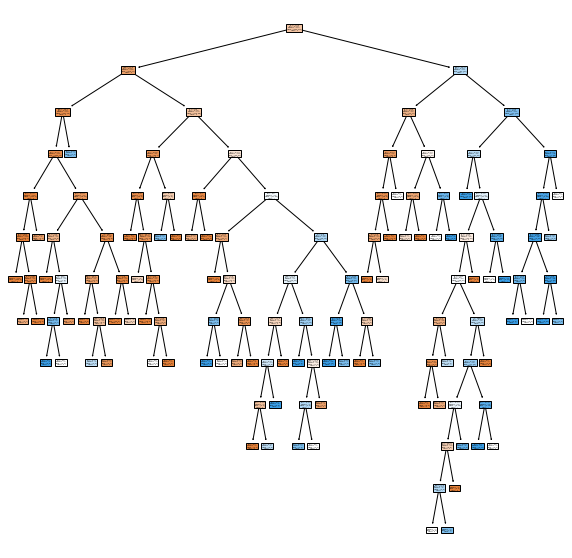

In [24]:
dtc_leaf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dtc_leaf.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc_leaf, feature_names=df.columns, class_names='Class', filled=True)
plt.show()

#### 3. 두 가지 모델에 대하여 GridSearchCV를 사용하여 best가 되는 경우의 파라미터 값과 그 때의 정확도를 계산

In [25]:
from sklearn.model_selection import GridSearchCV

- dtc

In [30]:
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [2,4,6],
}

In [35]:
grid_dtc = GridSearchCV(dtc, params, scoring='accuracy', cv=5)
grid_dtc.fit(X_train, y_train)
grid_dtc.best_params_

C:\ProgramData\Miniconda3\envs\kdig\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\envs\kdig\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Miniconda3\envs\kdig\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\ProgramData\Miniconda3\envs\kdig\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must b

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [46]:
best_dtc = grid_dtc.best_estimator_
best_dtc.score(X_test, y_test)

0.6818181818181818

- svc

In [41]:
params = {"C": [0.01, 0.1, 1, 10, 100]}

In [43]:
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1}

In [47]:
best_svc = grid_svc.best_estimator_
best_svc.score(X_test, y_test)

0.7402597402597403